### 가설 3: 수도권의 높은 생활비가 출산 기피로 이어진다.

- 먼저 한국인구통계 파일과 연도별 지역마다 물가수치 파일을 머지해야함

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Gulim'

data = pd.read_csv('data/한국인구통계2002-2022수정본.csv', encoding='euc-kr')

In [5]:
years = list(range(2000, 2023))

data1 = {
    'Region': [
        'Whole country', 'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
        'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do',
        'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju'
    ],
    '2000': [63.151, 61.828, 62.710, 63.668, 63.585, 63.967, 64.723, 63.407, 62.912, 62.912, 64.074, 64.456, 64.099, 63.922, 64.454, 65.734, 63.845, 64.358],
    '2001': [65.719, 64.512, 65.291, 66.061, 66.356, 66.312, 67.198, 65.917, 65.528, 65.528, 66.519, 66.776, 66.390, 66.394, 66.650, 68.040, 66.331, 66.288],
    '2002': [67.534, 66.640, 66.963, 67.653, 68.067, 67.756, 68.773, 67.623, 67.577, 67.577, 67.715, 67.953, 67.795, 67.720, 67.993, 69.240, 67.986, 68.182],
    '2003': [69.908, 69.180, 69.366, 69.886, 70.250, 69.985, 70.941, 69.927, 69.868, 69.868, 70.049, 70.353, 70.279, 70.037, 70.131, 71.015, 70.449, 70.402],
    '2004': [72.418, 71.874, 71.462, 71.945, 72.692, 72.948, 73.648, 72.596, 72.280, 72.280, 72.745, 72.684, 73.019, 72.743, 72.596, 73.414, 72.699, 73.223],
    '2005': [74.413, 73.755, 73.441, 73.796, 74.541, 75.166, 75.800, 74.823, 74.284, 74.284, 75.324, 74.962, 75.363, 74.746, 74.513, 75.593, 74.616, 75.058],
    '2006': [76.081, 75.279, 75.063, 75.481, 76.324, 76.851, 77.733, 76.875, 76.097, 76.097, 77.038, 76.661, 77.291, 76.378, 76.066, 77.345, 76.108, 76.503],
    '2007': [78.010, 77.252, 76.906, 77.264, 78.100, 78.855, 79.641, 79.064, 78.004, 78.004, 78.833, 78.748, 79.220, 78.253, 77.947, 79.241, 77.899, 78.135],
    '2008': [81.656, 80.466, 80.547, 80.979, 81.945, 82.595, 83.393, 83.180, 81.767, 81.767, 83.026, 82.789, 83.120, 82.090, 81.673, 83.437, 81.878, 82.131],
    '2009': [83.906, 82.838, 82.996, 82.885, 84.132, 84.681, 85.288, 85.113, 84.138, 84.138, 84.602, 84.806, 85.387, 84.482, 83.952, 85.409, 84.271, 83.620],
    '2010': [86.373, 85.162, 85.550, 85.229, 86.796, 87.173, 87.896, 87.815, 86.546, 86.546, 87.156, 87.300, 87.954, 87.250, 86.753, 88.111, 87.111, 86.446],
    '2011': [89.850, 88.412, 89.363, 88.766, 89.761, 90.726, 91.837, 91.313, 89.871, 89.871, 90.933, 91.148, 91.561, 91.066, 90.635, 91.863, 90.778, 90.156],
    '2012': [91.815, 90.605, 91.502, 90.939, 91.542, 92.347, 93.669, 93.272, 91.769, 91.769, 92.692, 92.938, 93.753, 93.051, 92.434, 93.713, 92.520, 91.257],
    '2013': [93.010, 91.869, 92.852, 92.442, 92.533, 93.540, 94.592, 94.688, 92.890, 92.890, 93.697, 94.104, 94.867, 94.173, 93.687, 94.798, 93.723, 92.519],
    '2014': [94.196, 93.300, 94.019, 93.769, 93.832, 95.041, 95.459, 95.812, 94.038, 94.038, 94.334, 95.220, 95.309, 95.233, 94.627, 95.758, 94.997, 93.550],
    '2015': [94.861, 94.470, 94.807, 94.464, 94.760, 95.306, 95.648, 96.251, 94.734, 94.734, 94.369, 95.073, 95.515, 95.205, 94.595, 95.795, 95.521, 94.149],
    '2016': [95.783, 95.585, 95.929, 95.412, 95.571, 96.180, 96.297, 97.205, 95.624, 95.624, 95.110, 95.613, 96.171, 95.718, 95.486, 96.452, 96.405, 95.366],
    '2017': [97.645, 97.494, 97.639, 97.358, 97.383, 98.191, 97.894, 99.006, 97.545, 97.545, 97.013, 97.524, 98.036, 97.492, 97.508, 98.240, 97.952, 97.553],
    '2018': [99.086, 98.799, 99.343, 99.047, 98.960, 99.345, 99.412, 100.026, 98.994, 98.994, 98.557, 99.122, 99.437, 99.158, 98.971, 99.703, 99.304, 99.252],
    '2019': [99.466, 99.382, 99.824, 99.710, 99.222, 99.564, 99.622, 99.705, 99.396, 99.396, 99.384, 99.487, 99.343, 99.467, 99.300, 99.875, 99.385, 99.574],
    '2020': [100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00],
    '2021': [102.50, 102.10, 102.46, 102.64, 102.62, 102.57, 102.50, 102.49, 102.71, 102.57, 102.80, 102.69, 102.77, 102.59, 102.62, 102.74, 102.53, 102.63],
    '2022': [107.72, 106.69, 107.35, 108.02, 107.96, 107.79, 107.52, 107.57, 108.23, 107.72, 108.98, 108.52, 108.74, 108.06, 108.43, 108.74, 107.98, 108.71],
}

# 데이터프레임 생성
df = pd.DataFrame(data1)

# 'Region'을 인덱스로 설정
df.set_index('Region', inplace=True)

# 데이터프레임을 'Year'와 'Price' 컬럼으로 변환
df_melted = df.reset_index().melt(id_vars=["Region"], var_name="Year", value_name="Price")

df_melted

,Region,Year,Price
0,Whole country,2000,63.151
1,Seoul,2000,61.828
2,Busan,2000,62.710
3,Daegu,2000,63.668
4,Incheon,2000,63.585
...,...,...,...
409,Jeollabuk-do,2022,108.060
410,Jeollanam-do,2022,108.430
411,Gyeongsangbuk-do,2022,108.740
412,Gyeongsangnam-do,2022,107.980


In [7]:
# Year 컬럼을 둘 다 int로 통일
df_melted['Year'] = df_melted['Year'].astype(int)
data['Year'] = data['Year'].astype(int)

# 혹시 Region도 타입이 다르면 맞추기 (문자열로 통일)
df_melted['Region'] = df_melted['Region'].astype(str)
data['Region'] = data['Region'].astype(str)

# 중복 제거 후 병합
df_melted_clean = df_melted.drop_duplicates(subset=['Region', 'Year'])
data_price = pd.merge(data, df_melted_clean, on=['Region', 'Year'], how='left')

# 확인
data_price

,Year,Region,Birth_rate,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity,Price
0,2000,Busan,11.61,5.8,2.5,7.5,5.8,False,True,62.710
1,2000,Chungcheongbuk-do,15.06,7.3,1.7,6.6,7.7,False,False,64.456
2,2000,Chungcheongnam-do,14.75,9.0,2.0,6.5,5.7,False,False,64.099
3,2000,Daegu,14.39,5.3,2.0,7.4,9.1,False,True,63.668
4,2000,Daejeon,16.08,4.9,2.4,7.5,11.2,False,True,64.723
...,...,...,...,...,...,...,...,...,...,...
4711,2022,Jeollanam-do,8.84,9.1,2.0,3.2,-5.4,False,False,108.430
4712,2022,Sejong,7.90,3.4,1.4,3.9,4.5,False,False,108.230
4713,2022,Seoul,8.84,4.7,1.4,3.4,-0.6,True,True,106.690
4714,2022,Ulsan,4.80,4.7,1.7,3.5,0.1,False,True,107.570


- 먼저 수도권과 비 수도권의 출산율을 비교해보자

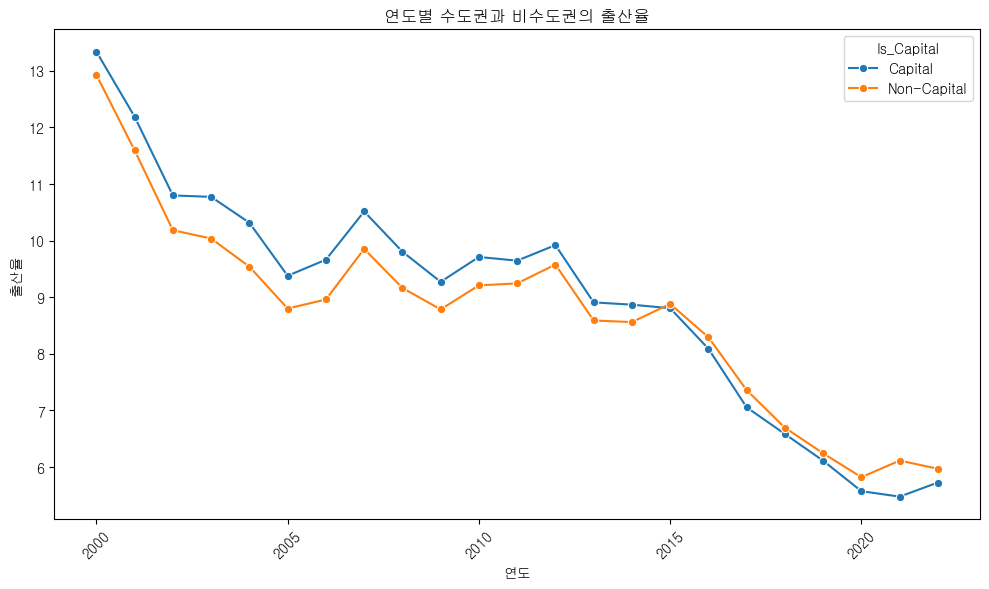

In [14]:
df = pd.DataFrame(data_price)

# 수도권과 비수도권 구분
df['Is_Capital'] = df['Is_Capital'].map({True: 'Capital', False: 'Non-Capital'})

# 연도별, 수도권/비수도권별 출산율(Natural_growth_rate) 평균 계산
df_grouped = df.groupby(['Year', 'Is_Capital'])['Birth_rate'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y='Birth_rate', hue='Is_Capital', marker='o')

# 그래프 제목과 레이블 설정
plt.title('연도별 수도권과 비수도권의 출산율')
plt.xlabel('연도')
plt.ylabel('출산율')

# 그래프 출력
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 그래프를 보면 수도권이나 비수도권의 출산율이 별로 차이가 나지 않는 것을 확인할 수 있다
- 그럼 이제 연도별 수도권과 비수도권의 물가를 비교해서 그래프로 나타내보자

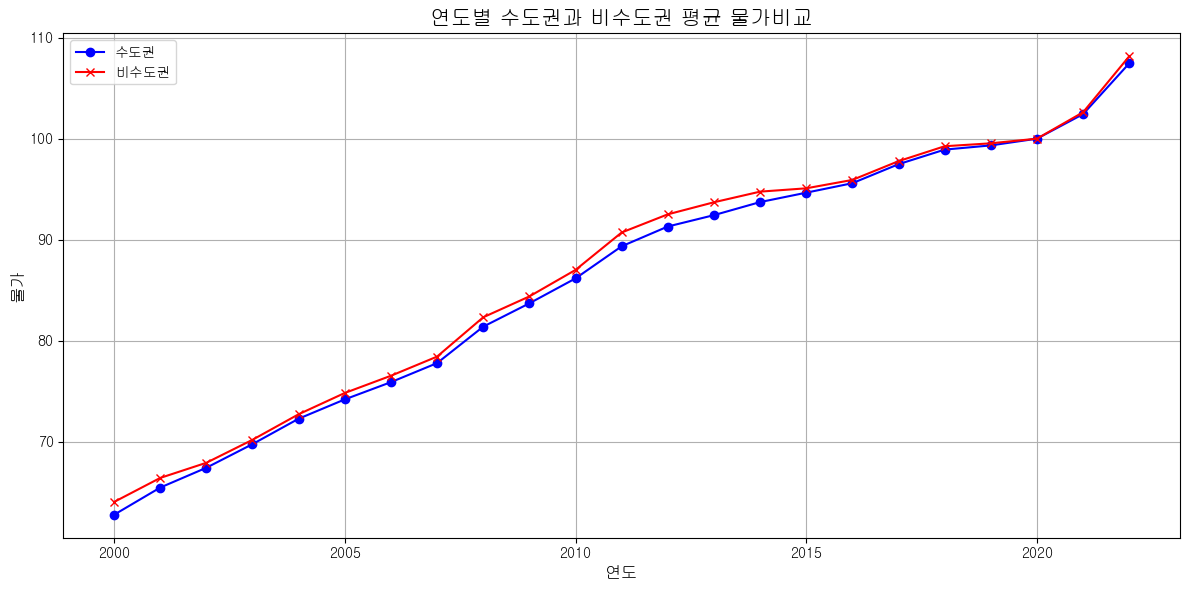

In [23]:


# 연도별, 수도권/비수도권별 Price 평균 계산
avg_price_by_region = data_price.groupby(['Year', 'Is_Capital'])['Price'].mean().reset_index()

# 피벗테이블로 변환하여 그래프 그리기 쉽게 정리
pivot_df = avg_price_by_region.pivot(index='Year', columns='Is_Capital', values='Price')

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(pivot_df.index, pivot_df[True], label='수도권', color='blue', marker='o')
plt.plot(pivot_df.index, pivot_df[False], label='비수도권', color='red', marker='x')

# 그래프 세부 설정
plt.title('연도별 수도권과 비수도권 평균 물가비교', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('물가', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 결론
- 연도별 수도권과 비수도권 평균 물가비교를 했을 때 물가가 별로 차이가 나지 않는 것을 확인 할 수 있다
- 수도권과 비수도권을 비교했을 때 출산율은 별로 차이가 없는 것을 확인

## 가설3 : 수도권의 높은 생활비가 출산 기피로 이어진다. 이것은 의미없는 가설임을 알 수 있음.